## Caballos de carreras

[Dataset Kaggle](https://www.kaggle.com/lukebyrne/horses-for-courses)


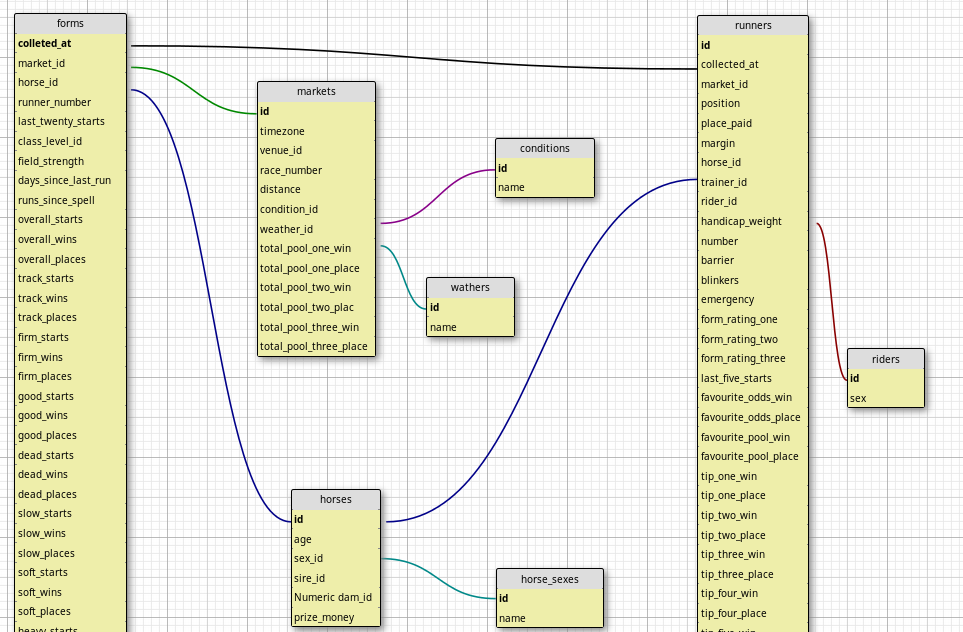

In [42]:
from IPython.display import Image
Image(filename='img/model-relational.png')

el data set nos presenta los datos organivados como un modelo relacional, en el se encuentra la tabla markers posee registos de carreras donde se muestran condiciones de la carrera y los montos de las apuesta a esta se le asignan caballos, cada uno posee un "form" o collecion de datos de sus carreresen los ultimos 10 dias.

In [43]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [44]:
d_horses = pd.read_csv("data/horses.csv")
d_runners = pd.read_csv("data/runners.csv")

In [45]:
d_horses.head()
d_runners.head()
#np.isnan(1) 

,id,collected_at,market_id,position,place_paid,margin,horse_id,trainer_id,rider_id,handicap_weight,...,tip_five_win,tip_five_place,tip_six_win,tip_six_place,tip_seven_win,tip_seven_place,tip_eight_win,tip_eight_place,tip_nine_win,tip_nine_place
0,4,2016-06-26 18:54:31.800293,1,NaN,1,NaN,4,4,4,58.5,...,t,t,f,t,f,t,f,t,t,t
1,10,2016-06-26 18:54:31.974395,1,NaN,0,NaN,10,4,10,56.5,...,f,f,f,f,f,f,f,f,f,f
2,5,2016-06-26 18:54:31.835329,1,NaN,0,NaN,5,5,5,56.5,...,f,t,f,f,f,f,f,f,f,f
3,6,2016-06-26 18:54:31.873492,1,NaN,0,NaN,6,6,6,56.5,...,f,f,f,f,f,f,f,f,f,f
4,1,2016-06-26 18:54:31.746854,1,NaN,0,NaN,1,1,1,58.5,...,f,f,f,f,f,f,f,f,f,f


In [46]:
d_horses.index = d_horses.id
#d_horses.id
print("horses shape :", d_horses.shape )
print("runners shape :", d_runners.shape )
d_horses.age[17]

('horses shape :', (21401, 6))
('runners shape :', (93450, 40))


2.0

## Histogram for ages 

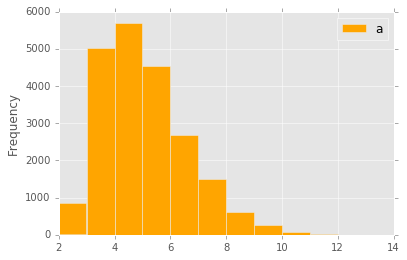

In [47]:
plt.figure();
df4 = pd.DataFrame({'a': d_horses.age}, columns=['a'])
df4.plot.hist(color='orange',bins= np.arange(2,14) )


In [48]:
age_np = np.array(d_horses.age).astype(int)
h = np.histogram(age_np,bins= np.arange(2,14))
#help(plt.hist)
print(h[0])
print(h[1])
print ("numero de horses con age" ,np.sum( h[0]) )
print ("numero de horses ", d_horses.age.shape[0]) 


[ 844 5032 5705 4542 2692 1503  612  270   76   17    4]
[ 2  3  4  5  6  7  8  9 10 11 12 13]
('numero de horses con age', 21297)
('numero de horses ', 21401)


## Histogram for Positions

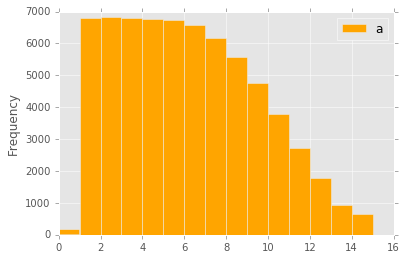

In [49]:
plt.figure();
df5 = pd.DataFrame({'a': d_runners.position}, columns=['a'], )
df5.plot.hist(color='orange',bins= np.arange(0,16) )

In [50]:
position_np = np.array(d_runners.position).astype(int)
h = np.histogram(position_np,bins= np.arange(0,22))
print (h[0])
print (h[1])
print ("numero de runners con posicion" ,np.sum(h[0]) )
print ("numero de runners ", d_runners.position.shape[0]) 


[ 163 6799 6819 6795 6783 6730 6574 6184 5580 4770 3786 2711 1796  923  506
  134   71    8    4    1    1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
('numero de runners con posicion', 67138)
('numero de runners ', 93450)


## Postion vs Age

In [104]:
import math
sum = 0
A=np.zeros((21,11), dtype=int)
for index, h in d_runners.iterrows():
    age=d_horses.age[h.horse_id]
    if ( np.isnan(h.position)  or  ( np.isnan(age) ) ) : 
        continue;
    A[h.position,age-2] +=1 
#print(A)
print(A.shape)

/opt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(21, 11)


(231, 2)


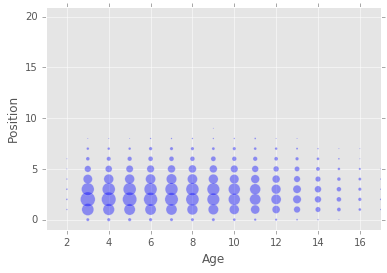

In [113]:
fig, ax = plt.subplots()

a = np.array([[i,j] for i in np.arange(0,21) for j in np.arange(0,11) ])
print(a.shape)

ax.scatter(a[:,0]+2, a[:,1], c="b", s=A.flatten()/10, alpha=0.4)
plt.axis([1,17,-1,21])
plt.xlabel('Age')
plt.ylabel('Position')
ax.grid(True)
plt.show()


Concluciones de la edad respecto a la posicion final de el caballo
 *